# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/M2-mini-project1/diamonds_clean.csv')
diamonds
# diamonds = diamonds.drop('Unnamed: 0', axis=1)

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_new_scale,color_new_scale
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.438475,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.311270,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.310140,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.630160,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.750385,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53927,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.499040,2,6
53928,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.609320,2,6
53929,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.560760,2,6
53930,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.742350,1,2


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_new_scale,color_new_scale
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540040,3.051101,3.405789
std,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.695562,1.647109,1.701165
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,2.239050,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910060,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.526310,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.036780,4.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,19.728555,7.000000,6.000000


In [4]:
#your comments here
"""The max price is 18823 but the 75% gives 5324 which means it has some outliers in price."""

'The max price is 18823 but the 75% gives 5324 which means it has some outliers in price.'

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [5]:
#your hypotheses here
"""The carat which is the weight and cut the quality of the diamond will affect the price."""

'The carat which is the weight and cut the quality of the diamond will affect the price.'

In [27]:
diamonds.corr()
"""For hypotheses I used correlation function to find out the relationship between each column."""

,carat,depth,table,price,x,y,z,clarity_new_scale,color_new_scale
carat,1.000000,0.028221,0.181658,0.921610,0.977765,0.953989,0.971803,-0.352877,-0.291447
depth,0.028221,1.000000,-0.295700,-0.010670,-0.025097,-0.029141,0.096702,-0.067286,-0.047300
table,0.181658,-0.295700,1.000000,0.127165,0.196130,0.184530,0.154644,-0.160401,-0.026511
price,0.921610,-0.010670,0.127165,1.000000,0.887227,0.867872,0.877908,-0.146886,-0.172569
x,0.977765,-0.025097,0.196130,0.887227,1.000000,0.974933,0.986391,-0.373009,-0.270780
y,0.953989,-0.029141,0.184530,0.867872,0.974933,1.000000,0.985228,-0.359157,-0.264025
z,0.971803,0.096702,0.154644,0.877908,0.986391,0.985228,1.000000,-0.374638,-0.273587
clarity_new_scale,-0.352877,-0.067286,-0.160401,-0.146886,-0.373009,-0.359157,-0.374638,1.000000,-0.025678
color_new_scale,-0.291447,-0.047300,-0.026511,-0.172569,-0.270780,-0.264025,-0.273587,-0.025678,1.000000


## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [6]:
#your code here
import numpy as np

diamonds.pivot_table(index=['color'], 
                     values=['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'clarity_new_scale', 'color_new_scale'],
                     aggfunc=np.mean)

,carat,clarity_new_scale,color_new_scale,depth,price,table,x,y,z
color,,,,,,,,,
D,0.657715,2.691025,6,61.698066,3168.106436,57.404355,5.417851,5.421928,3.343160
E,0.657867,2.969889,5,61.662090,3076.752475,57.491201,5.411580,5.419029,3.338662
F,0.736509,3.134605,4,61.694087,3725.091938,57.433148,5.616727,5.620529,3.466212
G,0.771088,3.463419,3,61.757449,3998.145173,57.288060,5.678549,5.681198,3.507515
H,0.911627,2.933871,2,61.836557,4484.958805,57.518176,5.984776,5.986256,3.700416
I,1.026927,2.964035,1,61.846385,5091.874954,57.577278,6.222826,6.222730,3.846801
J,1.162137,2.776353,0,61.887215,5323.818020,57.812393,6.519338,6.518105,4.032665


**What do you see? Pay special attention to the relationship between price and color.**

In [7]:
#your thoughts here
"""For Best color is having a low price mean, which means people were buying less diamonds with best colored  and 
may be the price is way too much thats the reason people were not buying them.
"""

'For Best color is having a low price mean, which means people were buying less diamonds with best colored  and \nmay be the price is way too much thats the reason people were not buying them.\n'

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

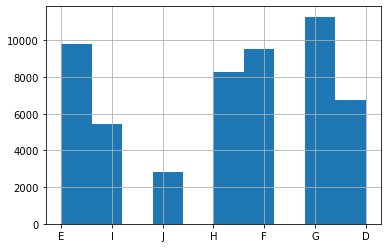

In [8]:
#your code here
diamonds['color'].hist()

In [9]:
#your comments here
"""For good colors the price mean is low whereas for the worst the price mean is increasing gradually. By this 
histogram I am predicting that people were less buying the best colored diamonds because of the price of it and
they prefering the low and worst colored diamond as price is the factor."""

'For good colors the price mean is low whereas for the worst the price mean is increasing gradually. By this \nhistogram I am predicting that people were less buying the best colored diamonds because of the price of it and\nthey prefering the low and worst colored diamond as price is the factor.'

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [10]:
#your code here
diamonds.pivot_table(index=['carat'], 
                     values=['color', 'depth', 'table', 'price', 'x', 'y', 'z', 'clarity_new_scale', 'color_new_scale'],
                     aggfunc=np.mean)

,clarity_new_scale,color_new_scale,depth,price,table,x,y,z
carat,,,,,,,,
0.20,2.833333,5.166667,61.100000,365.166667,59.333333,3.786667,3.753333,2.303021
0.21,2.666667,5.444444,60.511111,380.222222,58.444444,3.874444,3.837778,2.332788
0.22,2.600000,4.800000,61.620000,391.400000,60.400000,3.898000,3.848000,2.386137
0.23,4.901024,4.518771,61.426621,486.143345,58.034130,3.946382,3.973379,2.431810
0.24,4.972441,4.185039,61.599213,505.185039,57.488189,3.990157,4.019331,2.466390
...,...,...,...,...,...,...,...,...
4.00,0.000000,1.000000,63.300000,15984.000000,58.000000,10.010000,9.940000,6.314175
4.01,0.000000,0.500000,61.750000,15223.000000,61.500000,10.080000,10.020000,6.205350
4.13,0.000000,2.000000,64.800000,17329.000000,61.000000,10.000000,9.850000,6.431400


In [11]:
#your comments
"""With the increase in weight oh the diamond the price is also increasing. So, there is a strong positive relation
between them"""

'With the increase in weight oh the diamond the price is also increasing. So, there is a strong positive relation\nbetween them'


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

'From the plot we could say there are no data for the weight starting from 3.5. \nIf the weight is less people are buying more. '

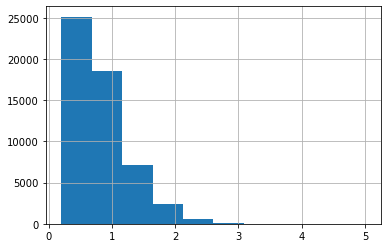

In [12]:
#your code here
diamonds['carat'].hist()
"""From the plot we could say there are no data for the weight starting from 3.5. 
If the weight is less people are buying more. """

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [13]:
#your code here
diamonds.pivot_table(index=['table'], 
                     values=['color', 'depth', 'carat', 'price', 'x', 'y', 'z', 'clarity_new_scale', 'color_new_scale'],
                     aggfunc=np.mean)

,carat,clarity_new_scale,color_new_scale,depth,price,x,y,z
table,,,,,,,,
43.0,1.0400,4.00,1.0,62.90,4997.0,6.450,6.410,4.044470
44.0,0.2900,4.00,5.0,62.80,474.0,4.200,4.240,2.650160
49.0,0.6500,3.00,3.0,64.25,2290.5,5.355,5.320,3.426663
50.0,1.5100,2.00,3.0,61.50,8995.5,7.380,7.295,4.510200
50.1,0.9400,1.00,2.0,66.00,3353.0,6.130,6.170,4.059000
...,...,...,...,...,...,...,...,...
71.0,0.6800,2.00,3.0,58.00,1633.0,5.850,5.700,3.349500
73.0,0.6025,3.25,4.5,68.90,2406.5,5.520,5.465,3.751165
76.0,0.7900,2.00,3.0,65.30,2362.0,5.520,5.130,3.477225


In [14]:
#your comments here
"""With the increase in the width of the diamond the price is not increasing nor decreasing they are closely related, 
for 44.0 width size the price mean is 474 but for 50 width its changing a lot so its a bit scattered I would say."""

'With the increase in the width of the diamond the price is not increasing nor decreasing they are closely related, \nfor 44.0 width size the price mean is 474 but for 50 width its changing a lot so its a bit scattered I would say.'

**Finally, do the same with the `clarity` column.**

In [15]:
#your code here
diamonds.pivot_table(index=['clarity'], 
                     values=['color', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'clarity_new_scale', 'color_new_scale'],
                     aggfunc=np.mean)

,carat,clarity_new_scale,color_new_scale,depth,price,table,x,y,z
clarity,,,,,,,,,
I1,1.283846,0,2.968961,62.734278,3924.168691,58.303779,6.761093,6.709379,4.223634
IF,0.505123,7,3.101676,61.510615,2864.839106,56.507207,4.968402,4.989827,3.062041
SI1,0.850482,2,3.448450,61.853042,3996.001148,57.662541,5.888383,5.888256,3.640928
SI2,1.077602,1,3.469967,61.771567,5062.267356,57.926823,6.404157,6.399890,3.953282
VS1,0.727108,4,3.161812,61.667968,3839.144308,57.313966,5.572860,5.582512,3.439044
VS2,0.763850,3,3.494370,61.724249,3924.166204,57.418040,5.658633,5.659782,3.492574
VVS1,0.503131,6,3.350848,61.624521,2519.512315,56.883881,4.961721,4.976437,3.061861
VVS2,0.596202,5,3.569483,61.663778,3283.737071,57.024990,5.218454,5.232118,3.221723


In [16]:
#your comments here
"""Clarity - Whether its a clear diamond or not people were not considering that , we can see them from the price mean
Its scattered for best clarity its less and for remaining ones its high and low. So I would say may be these are
closely weak relation"""

'Clarity - Whether its a clear diamond or not people were not considering that , we can see them from the price mean\nIts scattered for best clarity its less and for remaining ones its high and low. So I would say may be these are\nclosely weak relation'

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [17]:
#your thoughts here
"""I would say the carat which is the weight of the diamond matters a lot with the affect of price. If the weight is 
high the price is also high, if its low the price is decreasing."""

'I would say the carat which is the weight of the diamond matters a lot with the affect of price. If the weight is \nhigh the price is also high, if its low the price is decreasing.'

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


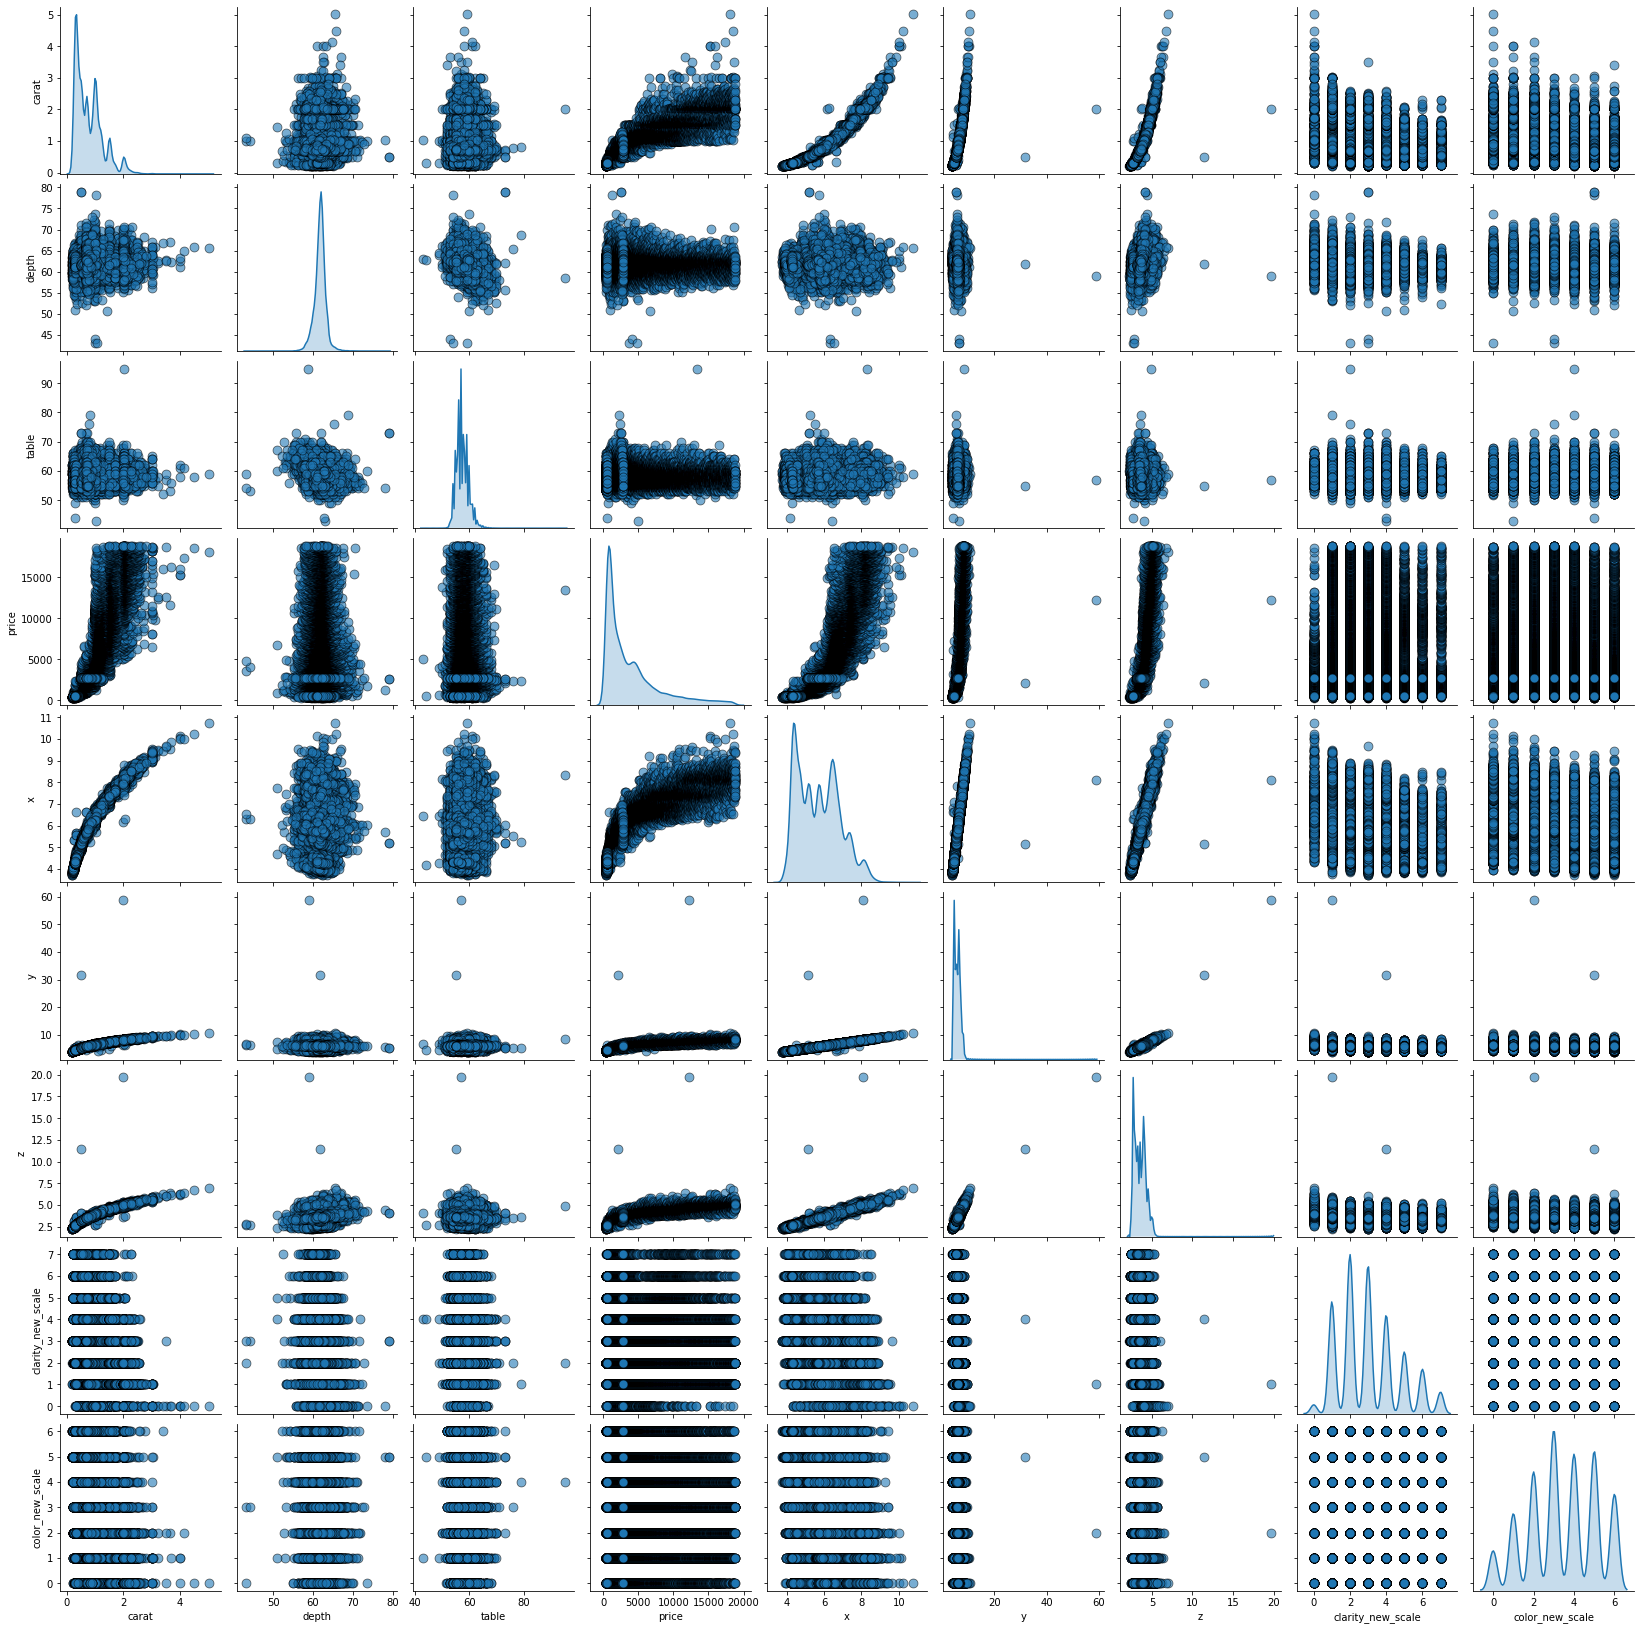

In [26]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [19]:
#your thoughts here


Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

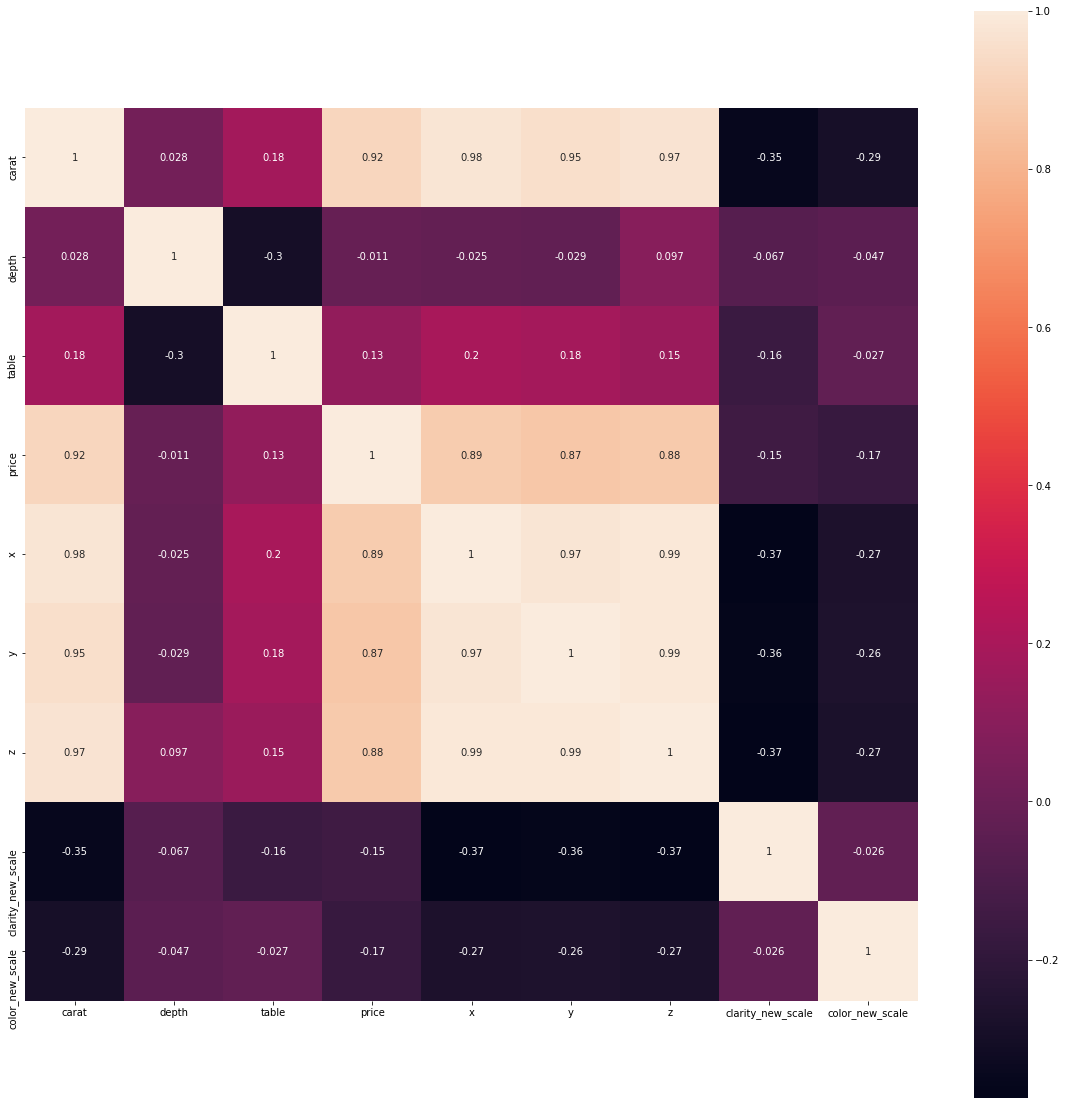

In [20]:
#Run this code
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

**What do you see here? Regarding the results before, does it fit with them?**

In [21]:
#your thoughts here

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

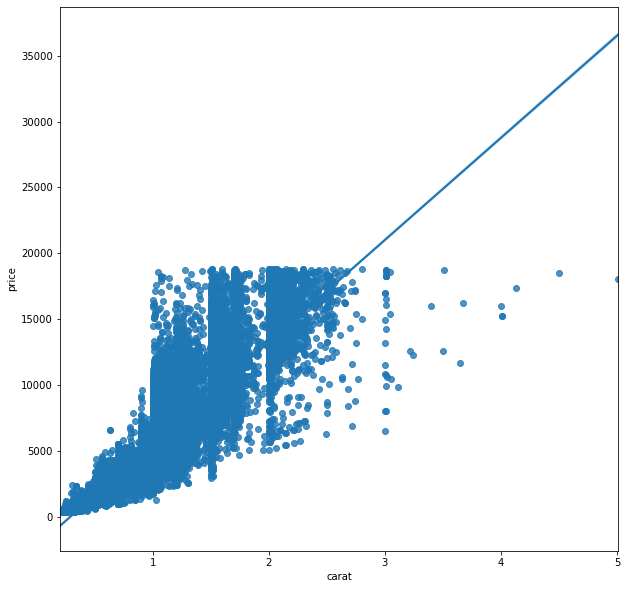

In [22]:
#Run this code
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [23]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8493658995804609

**What do you think?**

In [24]:
#your thoughts here

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [25]:
#your thoughts here

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.